<a href="https://colab.research.google.com/github/clovisdanielss/Estudando/blob/master/Python%20Scripts/nn-regression/Class_NNRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### What is regression

While a classification problem has a discrete answer, a regression problem's output is an real number. It's a set of statistical processes for estimating the relationship between a dependent variable (outcome variable) and one or more independent variable. 

In [1]:
import tensorflow as tf

def data_gen(x):
  return 3*x + 2.1

data = [tf.constant(list(range(100))), tf.constant([data_gen(x) for x in range(100)])]

In [2]:
data

[<tf.Tensor: shape=(100,), dtype=int32, numpy=
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99],
       dtype=int32)>, <tf.Tensor: shape=(100,), dtype=float32, numpy=
 array([  2.1,   5.1,   8.1,  11.1,  14.1,  17.1,  20.1,  23.1,  26.1,
         29.1,  32.1,  35.1,  38.1,  41.1,  44.1,  47.1,  50.1,  53.1,
         56.1,  59.1,  62.1,  65.1,  68.1,  71.1,  74.1,  77.1,  80.1,
         83.1,  86.1,  89.1,  92.1,  95.1,  98.1, 101.1, 104.1, 107.1,
        110.1, 113.1, 116.1, 119.1, 122.1, 125.1, 128.1, 131.1, 134.1,
        137.1, 140.1, 143.1, 146.1, 149.1, 152.1, 155.1, 158.1, 161.1,
        

In [3]:
model = tf.keras.Sequential([
      tf.keras.layers.Dense(1, input_shape=[1,])
])

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(
    x = data[0],
    y = data[1],
    epochs=5000,
    verbose=False
)

In [4]:
model.predict(tf.constant([[145]]))

array([[437.1]], dtype=float32)

In [5]:
data_gen(145)

437.1

In [6]:
model.get_weights()

[array([[3.]], dtype=float32), array([2.100004], dtype=float32)]

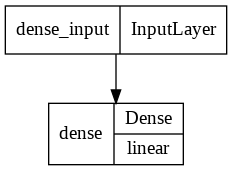

In [7]:
tf.keras.utils.plot_model(model, show_layer_activations=True)

### Note

As you can see, this is a dumb example of a linear regression. In the weights we see that we discovery the funcion of the method `data_gen`. Of course, there is no sense to use a ML to this example, because we know the function that generates the output. But It is a good exemple to understand what is happening.

In [8]:
tf.__version__

'2.8.0'

### Let's work with a database

In [9]:
import tensorflow_datasets as tfds
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
insurance = pd.read_csv("https://gist.githubusercontent.com/meperezcuello/82a9f1c1c473d6585e750ad2e3c05a41/raw/d42d226d0dd64e7f5395a0eec1b9190a10edbc03/Medical_Cost.csv")
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [11]:
insurance.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

### About the data

This datasets shows the medical billcharge for a pacient based on region of the country, if he was smoker, if he has children, based on his body mass index, sex and age.

In [12]:
insurance.isnull().any()

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


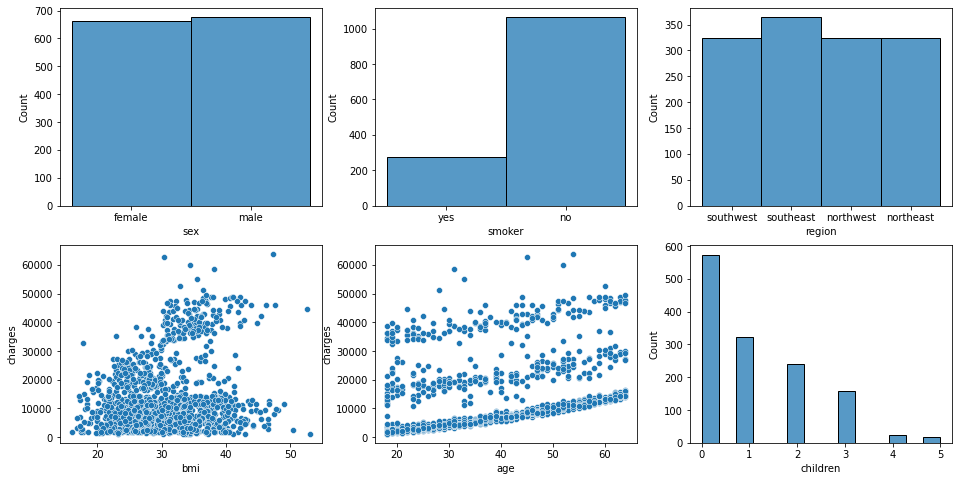

In [13]:
plt.figure(figsize=(16,8))
plt.subplot(2,3,1)
sns.histplot(insurance.sex)
plt.subplot(2,3,2)
sns.histplot(insurance.smoker)
plt.subplot(2,3,3)
sns.histplot(insurance.region)
plt.subplot(2,3,4)
sns.scatterplot(insurance.bmi, insurance.charges)
plt.subplot(2,3,5)
sns.scatterplot(insurance.age, insurance.charges)
plt.subplot(2,3,6)
sns.histplot(insurance.children)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

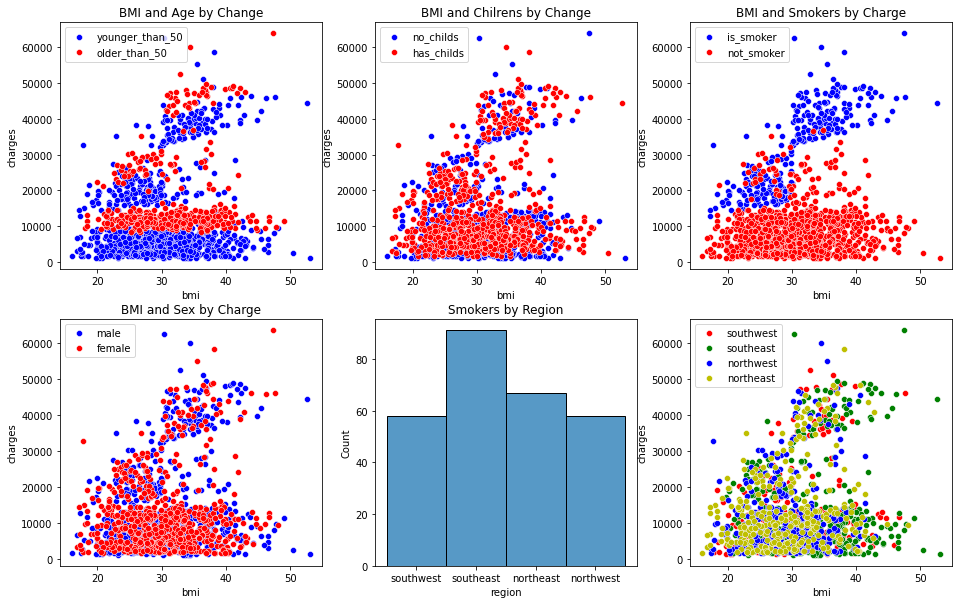

In [14]:
plt.figure(figsize=(16,10))
plt.subplot(2,3,1)
age_threshold =50
sns.scatterplot(insurance.bmi[insurance.age < age_threshold], insurance.charges[insurance.age < age_threshold], color="b", label="younger_than_50")
sns.scatterplot(insurance.bmi[insurance.age >= age_threshold], insurance.charges[insurance.age >= age_threshold], color="r", label="older_than_50")
plt.title("BMI and Age by Change")
plt.subplot(2,3,2)
children_threshold = 1
sns.scatterplot(insurance.bmi[insurance.children < children_threshold], insurance.charges[insurance.children < children_threshold], color="b", label="no_childs")
sns.scatterplot(insurance.bmi[insurance.children >= children_threshold], insurance.charges[insurance.children >= children_threshold], color="r", label="has_childs")
plt.title("BMI and Chilrens by Change")
plt.subplot(2,3,3)
is_smoker = 'yes'
sns.scatterplot(insurance.bmi[insurance.smoker == is_smoker], insurance.charges[insurance.smoker == is_smoker], color="b", label="is_smoker")
sns.scatterplot(insurance.bmi[insurance.smoker != is_smoker], insurance.charges[insurance.smoker != is_smoker], color="r", label="not_smoker")
plt.title("BMI and Smokers by Charge")
plt.subplot(2,3,4)
is_male = 'male'
sns.scatterplot(insurance.bmi[insurance.sex == is_male], insurance.charges[insurance.sex == is_male], color="b", label="male")
sns.scatterplot(insurance.bmi[insurance.sex != is_male], insurance.charges[insurance.sex != is_male], color="r", label="female")
plt.title("BMI and Sex by Charge")
plt.subplot(2,3,5)
sns.histplot(insurance.region[insurance.smoker == is_smoker])
plt.title("Smokers by Region")
plt.subplot(2,3,6)
for region,color in [("southwest", "r"),( "southeast", "g"), ("northwest", "b"), ("northeast", "y")]:
  sns.scatterplot(insurance.bmi[insurance.region == region], insurance.charges[insurance.region == region], color=color, label=region)

We can see that smokers pays a lot more than no-smokers

### Preparing the data

In [15]:
dataset = insurance.copy()
dataset = pd.concat([dataset, pd.get_dummies(dataset.sex)], axis=1)
dataset = dataset.drop("sex", axis=1)
dataset.head()

,age,bmi,children,smoker,region,charges,female,male
0,19,27.900,0,yes,southwest,16884.92400,1,0
1,18,33.770,1,no,southeast,1725.55230,0,1
2,28,33.000,3,no,southeast,4449.46200,0,1
3,33,22.705,0,no,northwest,21984.47061,0,1
4,32,28.880,0,no,northwest,3866.85520,0,1


In [16]:
dataset = pd.concat([dataset, pd.get_dummies(dataset.children)], axis=1)
dataset = dataset.drop("children", axis=1)
dataset.head()

,age,bmi,smoker,region,charges,female,male,0,1,2,3,4,5
0,19,27.900,yes,southwest,16884.92400,1,0,1,0,0,0,0,0
1,18,33.770,no,southeast,1725.55230,0,1,0,1,0,0,0,0
2,28,33.000,no,southeast,4449.46200,0,1,0,0,0,1,0,0
3,33,22.705,no,northwest,21984.47061,0,1,1,0,0,0,0,0
4,32,28.880,no,northwest,3866.85520,0,1,1,0,0,0,0,0


In [17]:
dataset = pd.concat([dataset, pd.get_dummies(dataset.region)], axis=1)
dataset = dataset.drop("region", axis=1)
dataset.head()

,age,bmi,smoker,charges,female,male,0,1,2,3,4,5,northeast,northwest,southeast,southwest
0,19,27.900,yes,16884.92400,1,0,1,0,0,0,0,0,0,0,0,1
1,18,33.770,no,1725.55230,0,1,0,1,0,0,0,0,0,0,1,0
2,28,33.000,no,4449.46200,0,1,0,0,0,1,0,0,0,0,1,0
3,33,22.705,no,21984.47061,0,1,1,0,0,0,0,0,0,1,0,0
4,32,28.880,no,3866.85520,0,1,1,0,0,0,0,0,0,1,0,0


In [18]:
dataset = pd.concat([dataset, pd.get_dummies(dataset.smoker)], axis=1)
dataset = dataset.drop("smoker", axis=1)
dataset.head()

,age,bmi,charges,female,male,0,1,2,3,4,5,northeast,northwest,southeast,southwest,no,yes
0,19,27.900,16884.92400,1,0,1,0,0,0,0,0,0,0,0,1,0,1
1,18,33.770,1725.55230,0,1,0,1,0,0,0,0,0,0,1,0,1,0
2,28,33.000,4449.46200,0,1,0,0,0,1,0,0,0,0,1,0,1,0
3,33,22.705,21984.47061,0,1,1,0,0,0,0,0,0,1,0,0,1,0
4,32,28.880,3866.85520,0,1,1,0,0,0,0,0,0,1,0,0,1,0


In [19]:
dataset.dtypes

age            int64
bmi          float64
charges      float64
female         uint8
male           uint8
0              uint8
1              uint8
2              uint8
3              uint8
4              uint8
5              uint8
northeast      uint8
northwest      uint8
southeast      uint8
southwest      uint8
no             uint8
yes            uint8
dtype: object

In [20]:
dataset_y = dataset.charges
dataset = dataset.drop("charges", axis=1)
dataset.head()

,age,bmi,female,male,0,1,2,3,4,5,northeast,northwest,southeast,southwest,no,yes
0,19,27.900,1,0,1,0,0,0,0,0,0,0,0,1,0,1
1,18,33.770,0,1,0,1,0,0,0,0,0,0,1,0,1,0
2,28,33.000,0,1,0,0,0,1,0,0,0,0,1,0,1,0
3,33,22.705,0,1,1,0,0,0,0,0,0,1,0,0,1,0
4,32,28.880,0,1,1,0,0,0,0,0,0,1,0,0,1,0


In [21]:
dataset_y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [22]:
dataset_tf = tf.data.Dataset.from_tensor_slices((dataset.to_numpy(), dataset_y.to_numpy()))

In [35]:
import math
total_test_samples = math.ceil(1337/5)
total_train_samples = 1337 - total_test_samples
dataset_shuffled = dataset_tf.shuffle(1000)
test_set = dataset_shuffled.take(total_test_samples)
train_set = dataset_shuffled.skip(total_test_samples)

In [36]:
len(list(test_set)),len(list(train_set)), len(list(dataset_tf))

(268, 1070, 1338)

In [37]:
batch_size = 32
train_set = train_set.batch(batch_size)
test_set = test_set.batch(batch_size)

### A simple dense model

In [50]:
model = tf.keras.models.Sequential([
      tf.keras.layers.Dense(100, activation="relu", input_shape=[16,]),
      tf.keras.layers.Dense(100, activation="relu"),
      tf.keras.layers.Dense(1)
])

model.compile(optimizer="adam",
              loss=tf.keras.losses.Huber(),
              metrics=["mae"])

stop_early = tf.keras.callbacks.EarlyStopping(patience=50)
#lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-5 * 10 ** (epoch/30))

log = model.fit(
    train_set,
    validation_data=test_set,
    epochs=500,
    callbacks=[stop_early],# lr_scheduler]
    verbose=False
)

2171.792236328125


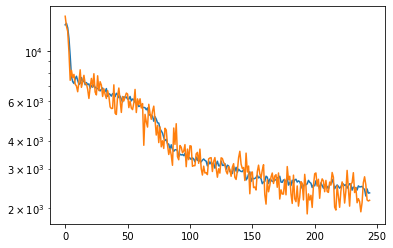

In [52]:
def plot_training():
  plt.plot(range(len(log.history["loss"])),log.history["loss"])
  plt.plot(range(len(log.history["loss"])),log.history["val_loss"])
  plt.yscale("log")
  print(log.history["val_mae"][-1])

plot_training()

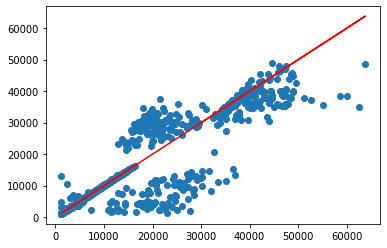

In [53]:
def plot_regression():
  x = dataset_tf.map(lambda x,y: x)
  x = x.batch(batch_size)
  pred = model.predict(x)
  y = dataset_tf.map(lambda x,y: y)
  y = tf.stack(list(y))
  plt.scatter(y, pred)
  plt.plot(y,y, c="r")
plot_regression()

### Let's try use more layers

In [54]:
model = tf.keras.models.Sequential([
      tf.keras.layers.Dense(256, activation="relu", input_shape=[16,]),
      tf.keras.layers.Dropout(.5),
      tf.keras.layers.Dense(128, activation="relu"),
      tf.keras.layers.Dropout(.5),
      tf.keras.layers.Dense(64, activation="relu"),
      tf.keras.layers.Dense(1)
])

model.compile(optimizer="adam",
              loss=tf.keras.losses.Huber(),
              metrics=["mae"])

stop_early = tf.keras.callbacks.EarlyStopping(patience=50)
#lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-5 * 10 ** (epoch/30))

log = model.fit(
    train_set,
    validation_data=test_set,
    epochs=500,
    callbacks=[stop_early],# lr_scheduler]
    verbose=False
)

2678.899169921875


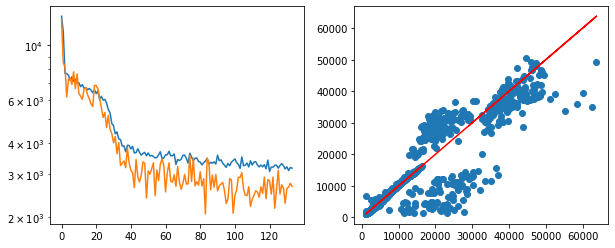

In [55]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plot_training()
plt.subplot(1,2,2)
plot_regression()

Didn't work. Actualy, the MAE is even worse.

### Let's try use even more layers

In [56]:
model = tf.keras.models.Sequential([
      tf.keras.layers.Dense(256, activation="relu", input_shape=[16,]),
      tf.keras.layers.Dropout(.5),
      tf.keras.layers.Dense(128, activation="relu"),
      tf.keras.layers.Dropout(.5),
      tf.keras.layers.Dense(64, activation="relu"),
      tf.keras.layers.Dropout(.5),
      tf.keras.layers.Dense(128, activation="relu"),
      tf.keras.layers.Dropout(.5),
      tf.keras.layers.Dense(64, activation="relu"),
      tf.keras.layers.Dense(1)
])

model.compile(optimizer="adam",
              loss=tf.keras.losses.Huber(),
              metrics=["mae"])

stop_early = tf.keras.callbacks.EarlyStopping(patience=50)
#lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-5 * 10 ** (epoch/30))

log = model.fit(
    train_set,
    validation_data=test_set,
    epochs=500,
    callbacks=[stop_early],# lr_scheduler]
    verbose=False
)

2590.1171875


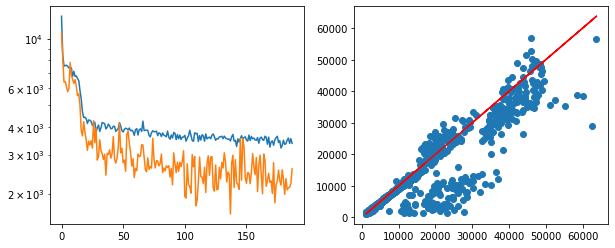

In [57]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plot_training()
plt.subplot(1,2,2)
plot_regression()

Maybe the problem is in the model. The MAE is worse again. Let's try again with our first model, but this time let's change the activation of the hidden layer.

### Trying our first model again

We will try ahead some types of elus, and also we will extend the patience time, to see if the model converges.

1620.9029541015625
1692.4700927734375
2331.17529296875
2788.2783203125


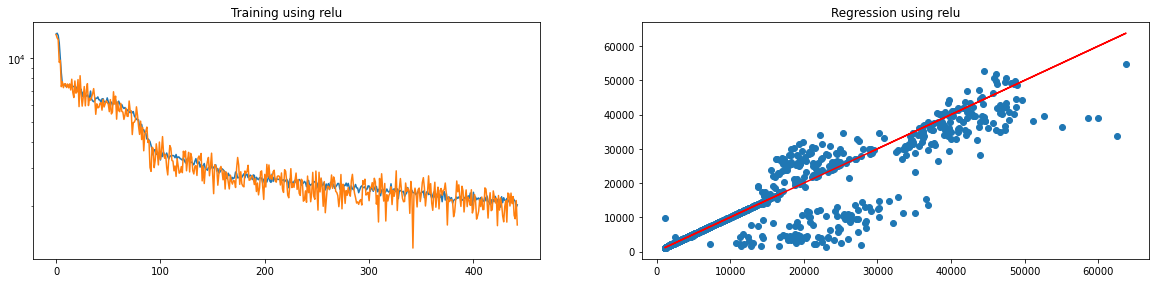

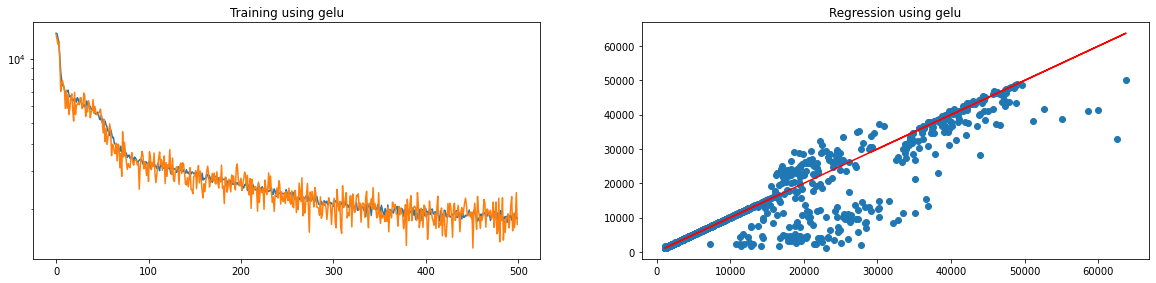

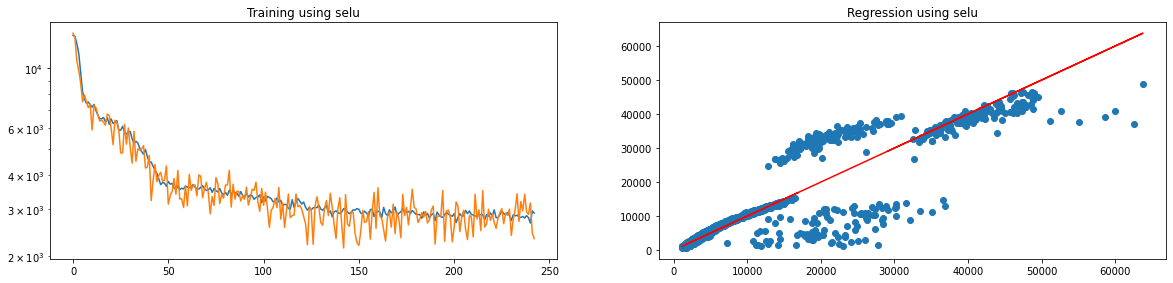

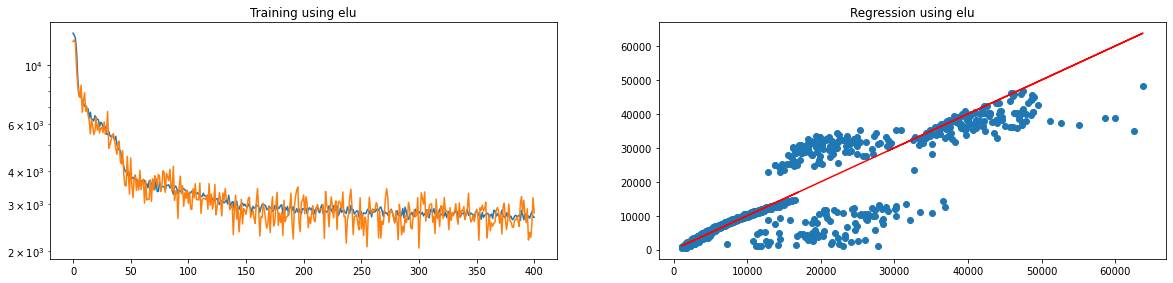

In [67]:
activations = ["relu", "gelu", "selu", "elu"]
for i in range(len(activations)):
  model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(100, activation=activations[i], input_shape=[16,]),
        tf.keras.layers.Dense(100, activation=activations[i]),
        tf.keras.layers.Dense(1)
  ])

  model.compile(optimizer="adam",
                loss=tf.keras.losses.Huber(),
                metrics=["mae"])

  stop_early = tf.keras.callbacks.EarlyStopping(patience=100)
  #lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-5 * 10 ** (epoch/30))

  log = model.fit(
      train_set,
      validation_data=test_set,
      epochs=500,
      callbacks=[stop_early],# lr_scheduler]
      verbose=False
  )

  plt.figure(figsize=(20,20))
  plt.subplot(1*len(activations),2,(2*i)+1)
  plt.title(f"Training using {activations[i]}")
  plot_training()
  plt.subplot(1*len(activations),2,((2*i)+1)+1)
  plt.title(f"Regression using {activations[i]}")
  plot_regression()

Okay, out best bet is the relu function. We also observe that it was still converging. Maybe we just need to drop the patience and let it training until exaustion. 
We will now use our second model which uses relu.

### Trying second model again

2006.2576904296875


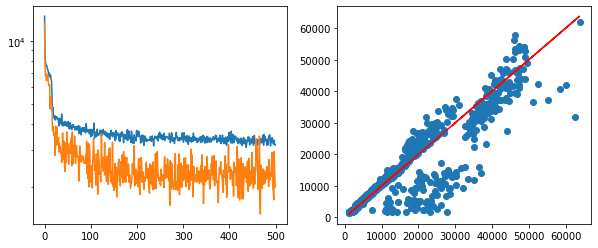

In [68]:
model = tf.keras.models.Sequential([
      tf.keras.layers.Dense(256, activation="relu", input_shape=[16,]),
      tf.keras.layers.Dropout(.5),
      tf.keras.layers.Dense(128, activation="relu"),
      tf.keras.layers.Dropout(.5),
      tf.keras.layers.Dense(64, activation="relu"),
      tf.keras.layers.Dropout(.5),
      tf.keras.layers.Dense(128, activation="relu"),
      tf.keras.layers.Dropout(.5),
      tf.keras.layers.Dense(64, activation="relu"),
      tf.keras.layers.Dense(1)
])

model.compile(optimizer="adam",
              loss=tf.keras.losses.Huber(),
              metrics=["mae"])

#Setting patience to 500 just to not erase the code. Lazyness
stop_early = tf.keras.callbacks.EarlyStopping(patience=500)
#lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-5 * 10 ** (epoch/30))

log = model.fit(
    train_set,
    validation_data=test_set,
    epochs=500,
    callbacks=[stop_early],# lr_scheduler]
    verbose=False
)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plot_training()
plt.subplot(1,2,2)
plot_regression()

Considering that we are using dropout, make senses that the training will take longer to converge. So, we'll try using more epochs. 

To do so, we will also make a checkpoint of our model.

1973.44873046875


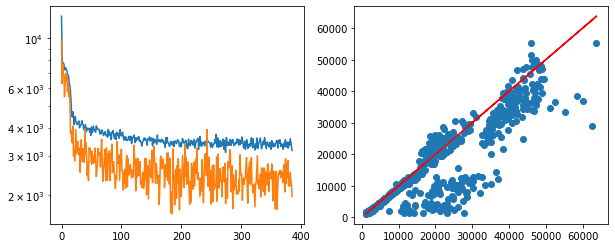

In [69]:
model = tf.keras.models.Sequential([
      tf.keras.layers.Dense(256, activation="relu", input_shape=[16,]),
      tf.keras.layers.Dropout(.5),
      tf.keras.layers.Dense(128, activation="relu"),
      tf.keras.layers.Dropout(.5),
      tf.keras.layers.Dense(64, activation="relu"),
      tf.keras.layers.Dropout(.5),
      tf.keras.layers.Dense(128, activation="relu"),
      tf.keras.layers.Dropout(.5),
      tf.keras.layers.Dense(64, activation="relu"),
      tf.keras.layers.Dense(1)
])

model.compile(optimizer="adam",
              loss=tf.keras.losses.Huber(),
              metrics=["mae"])

stop_early = tf.keras.callbacks.EarlyStopping(patience=200)
checkpoint = tf.keras.callbacks.ModelCheckpoint("checkpoint.h5", save_best_only=True)

log = model.fit(
    train_set,
    validation_data=test_set,
    epochs=5000,
    callbacks=[stop_early, checkpoint],
    verbose=False
)

model = tf.keras.models.load_model("checkpoint.h5")

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plot_training()
plt.subplot(1,2,2)
plot_regression()

Okay, so our best model converged on the epoch 400, and we didn't get any better. Maybe It's time to go back to the data and try to normalize the scales. 

### Normalizing and Retrying

In [82]:
dataset = insurance.copy()
dataset = pd.concat([dataset, pd.get_dummies(dataset.sex)], axis=1)
dataset = dataset.drop("sex", axis=1)

dataset = pd.concat([dataset, pd.get_dummies(dataset.region)], axis=1)
dataset = dataset.drop("region", axis=1)

dataset = pd.concat([dataset, pd.get_dummies(dataset.smoker)], axis=1)
dataset = dataset.drop("smoker", axis=1)

dataset_y = dataset.charges
dataset = dataset.drop("charges", axis=1)

In [83]:
from sklearn.preprocessing import MinMaxScaler
scaller = MinMaxScaler()
scaller.fit(dataset[["age","bmi","children"]])
dataset[["age","bmi","children"]] = scaller.transform(dataset[["age","bmi","children"]])
dataset

,age,bmi,children,female,male,northeast,northwest,southeast,southwest,no,yes
0,0.021739,0.321227,0.0,1,0,0,0,0,1,0,1
1,0.000000,0.479150,0.2,0,1,0,0,1,0,1,0
2,0.217391,0.458434,0.6,0,1,0,0,1,0,1,0
3,0.326087,0.181464,0.0,0,1,0,1,0,0,1,0
4,0.304348,0.347592,0.0,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,0.695652,0.403820,0.6,0,1,0,1,0,0,1,0
1334,0.000000,0.429379,0.0,1,0,1,0,0,0,1,0
1335,0.000000,0.562012,0.0,1,0,0,0,1,0,1,0
1336,0.065217,0.264730,0.0,1,0,0,0,0,1,1,0


Now we have the data normalized.

In [84]:
dataset_tf = tf.data.Dataset.from_tensor_slices((dataset.to_numpy(), dataset_y.to_numpy()))

total_test_samples = math.ceil(1337/5)
total_train_samples = 1337 - total_test_samples
dataset_shuffled = dataset_tf.shuffle(1000)
test_set = dataset_shuffled.take(total_test_samples)
train_set = dataset_shuffled.skip(total_test_samples)

batch_size = 32
train_set = train_set.batch(batch_size)
test_set = test_set.batch(batch_size)

Let's check all the activations again

2562.93408203125
2466.299560546875
2549.855712890625
3160.169189453125


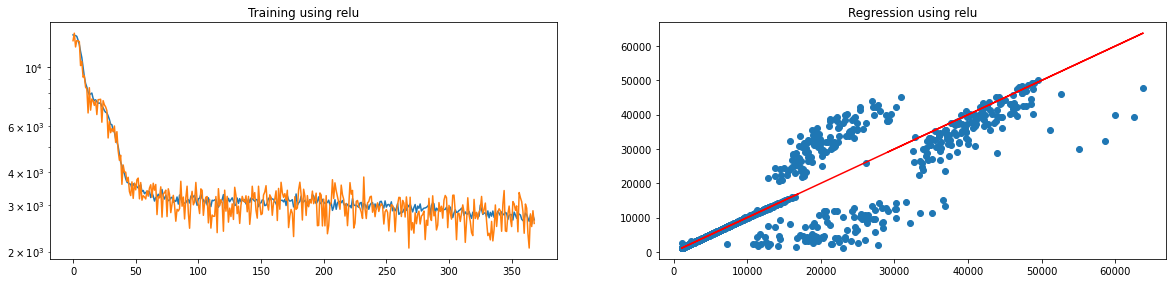

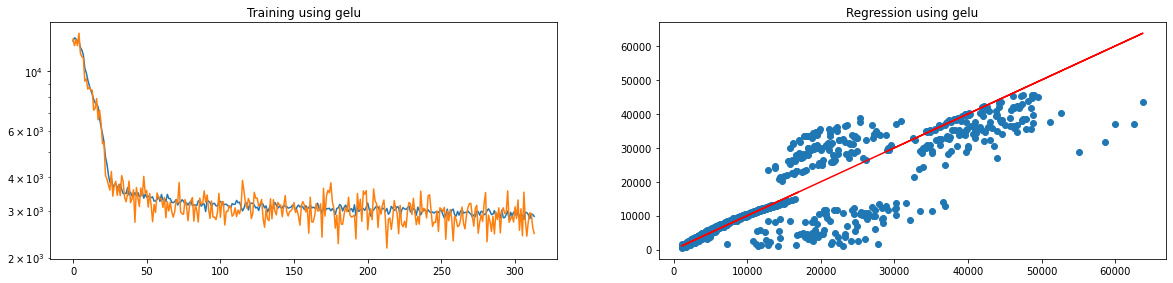

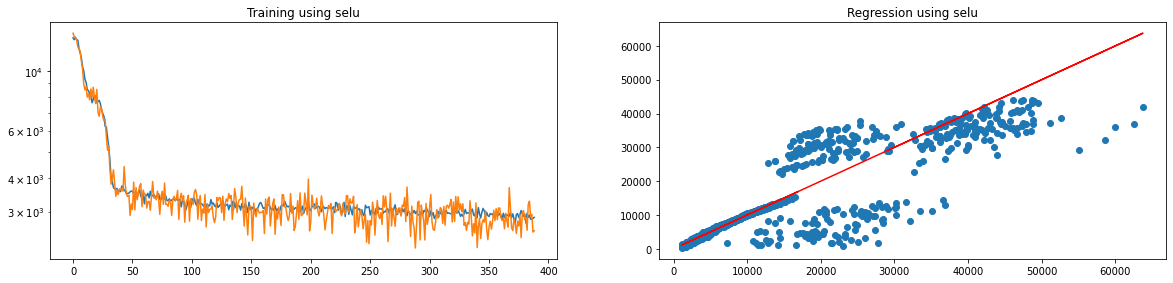

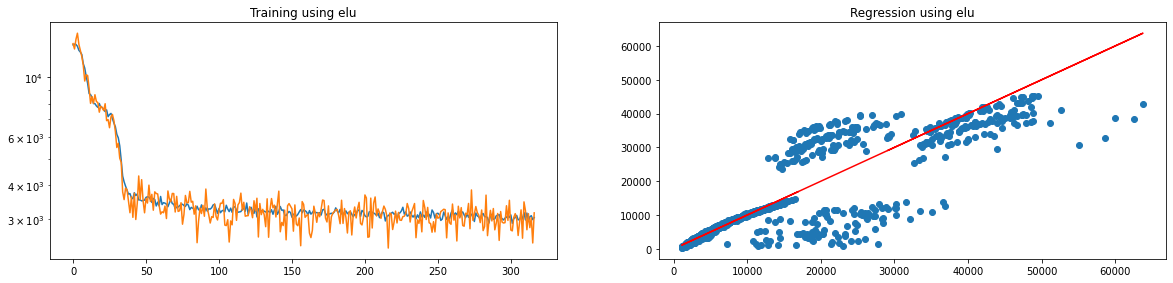

In [85]:
activations = ["relu", "gelu", "selu", "elu"]
for i in range(len(activations)):
  model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(100, activation=activations[i], input_shape=[11,]),
        tf.keras.layers.Dense(100, activation=activations[i]),
        tf.keras.layers.Dense(1)
  ])

  model.compile(optimizer="adam",
                loss=tf.keras.losses.Huber(),
                metrics=["mae"])

  stop_early = tf.keras.callbacks.EarlyStopping(patience=100)
  #lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-5 * 10 ** (epoch/30))

  log = model.fit(
      train_set,
      validation_data=test_set,
      epochs=500,
      callbacks=[stop_early],# lr_scheduler]
      verbose=False
  )

  plt.figure(figsize=(20,20))
  plt.subplot(1*len(activations),2,(2*i)+1)
  plt.title(f"Training using {activations[i]}")
  plot_training()
  plt.subplot(1*len(activations),2,((2*i)+1)+1)
  plt.title(f"Regression using {activations[i]}")
  plot_regression()

It performed worse after the normalization. I didnt put here, but when using hot encoding for the children was even worse. 

1687.4996337890625


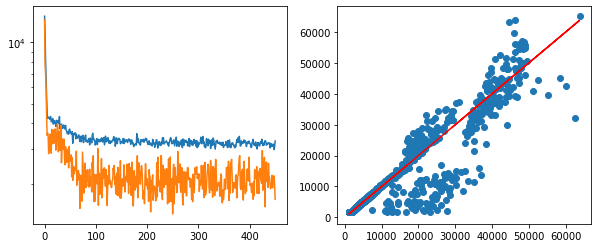

In [87]:
model = tf.keras.models.Sequential([
      tf.keras.layers.Dense(256, activation="relu", input_shape=[11,]),
      tf.keras.layers.Dropout(.5),
      tf.keras.layers.Dense(128, activation="relu"),
      tf.keras.layers.Dropout(.5),
      tf.keras.layers.Dense(64, activation="relu"),
      tf.keras.layers.Dropout(.5),
      tf.keras.layers.Dense(128, activation="relu"),
      tf.keras.layers.Dropout(.5),
      tf.keras.layers.Dense(64, activation="relu"),
      tf.keras.layers.Dense(1)
])

model.compile(optimizer="adam",
              loss=tf.keras.losses.Huber(),
              metrics=["mae"])

stop_early = tf.keras.callbacks.EarlyStopping(patience=200)
checkpoint = tf.keras.callbacks.ModelCheckpoint("checkpoint.h5", save_best_only=True)

log = model.fit(
    train_set,
    validation_data=test_set,
    epochs=5000,
    callbacks=[stop_early, checkpoint],
    verbose=False
)

model = tf.keras.models.load_model("checkpoint.h5")

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plot_training()
plt.subplot(1,2,2)
plot_regression()

### Conclusion

The normalization helped us to achieve a better MAE, but still as we can see the training was too noisy, so it didn't help that much. 

The most hard value to predict was between 10-30k, at least when visualizing, it was an area were all the features were very mixed.